<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Titillium+Web:ital,wght@0,200;0,300;0,400;0,600;0,700;0,900;1,200;1,300;1,400;1,600;1,700&display=swap" rel="stylesheet">
<div class="box" style="padding: 10px; margin: 10px 0; background-color: gray; color: white; border-radius: 5px; font-size: 15px;">
  <table style="padding: 10px; margin: auto auto; background-color: gray;  border-radius: 5px; font-size: 15px;">
      <tr>
          <th colspan='2'><h1 style="text-align: center">
Machine Learning </br>
</h1>
<h2 style="text-align: center">
Course Assignment Two </br>
</h2>
</th>
<tr>
    <tr>
      <th colspan="2">Personal Info</th>
    </tr>
    <tr>
      <td>First Name:</td>
      <td>Ali</td>
    </tr>
    <tr>
      <td>Last Name:</td>
      <td>Nikkhah</td>
    </tr>
    <tr>
      <td>Student Number:</td>
      <td>99102445</td>
    </tr>
    <tr>
      <td>Github:</td>
      <td><a href="https://github.com/AliNikkhah2001/MachineLearning02" target="_blank">https://github.com/AliNikkhah2001/MachineLearning02</a></td>
    </tr>
  </table>
</div>



In [ ]:
# install CuPy
%%capture
!pip install chainer

In [ ]:
!curl https://colab.chainer.org/install | sh -
import cupy as cp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1553  100  1553    0     0   5683      0 --:--:-- --:--:-- --:--:--  5688
********************************************************************************
CUDA version could not be detected!
Try installing Chainer manually by: pip install chainer
********************************************************************************


In [ ]:
!nvidia-smi

Wed May  1 04:01:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score


---
# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def calculate_loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def calculate_gradient(self, X, y, y_pred):
        num_samples = len(y)
        dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / num_samples) * np.sum(y_pred - y)
        return dw, db

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        loss_values = []

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            loss = self.calculate_loss(y, y_pred)
            loss_values.append(loss)

            dw, db = self.calculate_gradient(X, y, y_pred)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        # Plot loss vs iteration
        plt.plot(loss_values)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss vs Iteration')
        plt.show()

        return loss_values

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_cls)

    def calculate_accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

    def calculate_precision(self, y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        return true_positives / (true_positives + false_positives + 1e-8)

    def calculate_recall(self, y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))
        return true_positives / (true_positives + false_negatives + 1e-8)

    def calculate_f1(self, y_true, y_pred):
        precision = self.calculate_precision(y_true, y_pred)
        recall = self.calculate_recall(y_true, y_pred)
        return 2 * (precision * recall) / (precision + recall + 1e-8)

    def confusion_matrix(self, y_true, y_pred):
        TP = np.sum((y_true == 1) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))
        return TP, TN, FP, FN


**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [ ]:
df = pd.read_csv('Logistic_question.csv')
df['Target'] =df['Target'] > 0.5
# Split features and target
X = df.drop(columns=['Target'])
y = df['Target'] > 0.5

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def normalize_features(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train_normalized = (X_train - mean) / (std + 1e-8)  # Adding a small value to avoid division by zero
    X_test_normalized = (X_test - mean) / (std + 1e-8)
    return X_train_normalized, X_test_normalized




In [ ]:
X_train_normalized, X_test_normalized = normalize_features(X_train, X_test)


print("Normalized X_train:", X_train_normalized)
print("Normalized X_test:", X_test_normalized)
print("Encoded y_train:", y_train)
print("Encoded y_test:", y_test)

Normalized X_train:      Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
3     0.457111   0.424662  -0.057308   0.127156  -1.059652   0.139866   
18    0.102289   0.424662  -0.057308   0.617396  -0.501940   0.361100   
202   2.053813   2.085930   1.689221   1.107637   1.171194   2.250095   
250   0.279700  -0.572099  -0.057308  -0.363084  -1.059652  -0.030313   
274  -0.163828  -1.236607  -1.803837  -1.343565  -1.059652  -1.085428   
..         ...        ...        ...        ...        ...        ...   
71    1.698990   0.756915   1.689221   1.597877   1.728905   1.994826   
106   1.078051   0.590789   0.815957   1.107637   1.171194   1.007783   
270  -0.962179  -0.405972  -0.930573  -0.853324  -0.501940  -0.625942   
348  -1.317002  -1.402734  -1.803837  -1.343565  -1.617363  -2.276686   
102  -0.252534  -0.239846  -0.930573   0.617396   0.055771  -0.574888   

     Feature 7  
3     0.927613  
18   -1.078036  
202   0.927613  
250   0.927613  
274  -1.078036  
.

In [ ]:
print(X.head(5))
print(y.head(5))

   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  Feature 7
0         47       11.8          4        4.5        4.5       9.65          1
1         34       10.7          4        4.0        4.5       8.87          1
2         26       10.4          3        3.0        3.5       8.00          1
3         32       11.0          3        3.5        2.5       8.67          1
4         24       10.3          2        2.0        3.0       8.21          0
0    True
1    True
2    True
3    True
4    True
Name: Target, dtype: bool


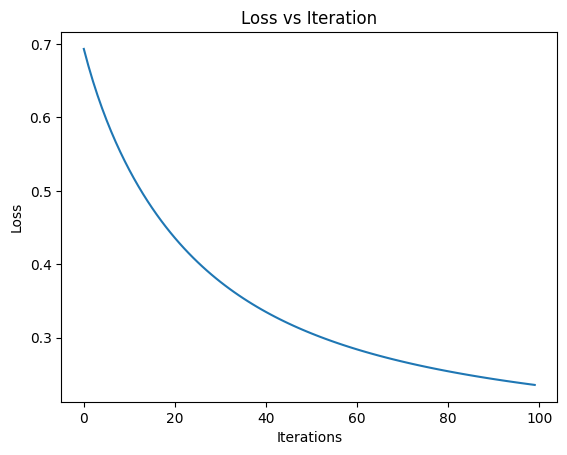

Accuracy: 0.875
Precision: 0.874999999890625
Recall: 0.9999999998571429
F1 Score: 0.9333333282311113
Confusion Matrix:
TP: 70
TN: 0
FP: 10
FN: 0


In [ ]:
    # Initialize and train the model
    model = LogisticRegression(learning_rate=0.1, num_iterations=100 )
    loss_values = model.fit(X_train_normalized, y_train)

    # Make predictions
    y_pred = model.predict(X_test_normalized)

    # Evaluate the model
    accuracy = model.calculate_accuracy(y_test, y_pred)
    precision = model.calculate_precision(y_test, y_pred)
    recall = model.calculate_recall(y_test, y_pred)
    f1 = model.calculate_f1(y_test, y_pred)

    # Report the results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Print confusion matrix
    TP, TN, FP, FN = model.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print("TP:", TP)
    print("TN:", TN)
    print("FP:", FP)
    print("FN:", FN)



## Now we implement the same class on cupy library on GPU

In [ ]:
import cupy as cp
import matplotlib.pyplot as plt

class LogisticRegressionGPU:
    def __init__(self, learning_rate=0.01, num_iterations=100, epsilon=5e-2):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.epsilon = epsilon
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + cp.exp(-z))

    def calculate_loss(self, y, y_pred):
        return -cp.mean(y * cp.log(y_pred) + (1 - y) * cp.log(1 - y_pred))

    def calculate_gradient(self, X, y, y_pred):
        num_samples = len(y)
        dw = (1 / num_samples) * cp.dot(X.T, (y_pred - y))
        db = (1 / num_samples) * cp.sum(y_pred - y)
        return dw, db

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = cp.zeros(num_features)
        self.bias = 0
        loss_values = []

        for i in range(self.num_iterations):
            linear_model = cp.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            loss = self.calculate_loss(y, y_pred)
            loss_values.append(loss)

            dw, db = self.calculate_gradient(X, y, y_pred)
            gradient_norm = cp.sqrt(cp.sum(dw**2) + db**2)
            if gradient_norm < self.epsilon:
                print(f"Stopping early at iteration {i} due to small gradient.")
                break

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        # Convert the loss history from CuPy array to NumPy array before plotting
        loss_history_numpy = cp.asnumpy(cp.array(loss_values))
        plt.plot(loss_history_numpy)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss History During Training')
        plt.grid(True)
        plt.show()

        return loss_values

    def predict(self, X):
        linear_model = cp.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_cls = cp.where(y_pred > 0.5, 1, 0)
        return y_pred_cls.get()

    def calculate_accuracy(self, y_true, y_pred):
        return cp.mean(y_true == y_pred)

    def calculate_precision(self, y_true, y_pred):
        true_positives = cp.sum((y_true == 1) & (y_pred == 1))
        false_positives = cp.sum((y_true == 0) & (y_pred == 1))
        return true_positives / (true_positives + false_positives + 1e-8)

    def calculate_recall(self, y_true, y_pred):
        true_positives = cp.sum((y_true == 1) & (y_pred == 1))
        false_negatives = cp.sum((y_true == 1) & (y_pred == 0))
        return true_positives / (true_positives + false_negatives + 1e-8)

    def calculate_f1(self, y_true, y_pred):
        precision = self.calculate_precision(y_true, y_pred)
        recall = self.calculate_recall(y_true, y_pred)
        return 2 * (precision * recall) / (precision + recall + 1e-8)

    def confusion_matrix(self, y_true, y_pred):
        TP = cp.sum((y_true == 1) & (y_pred == 1))
        TN = cp.sum((y_true == 0) & (y_pred == 0))
        FP = cp.sum((y_true == 0) & (y_pred == 1))
        FN = cp.sum((y_true == 1) & (y_pred == 0))
        return TP, TN, FP, FN


Stopping early at iteration 31 due to small gradient.


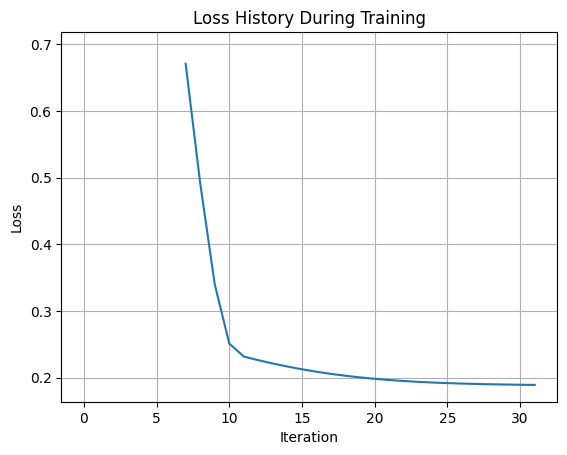

Accuracy: 0.875
Precision: 0.874999999890625
Recall: 0.9999999998571429
F1 Score: 0.9333333282311113
Confusion Matrix:
TP: 70
TN: 0
FP: 10
FN: 0


In [ ]:

X_train_gpu = cp.asarray(X_train.values)
X_test_gpu = cp.asarray(X_test.values)
y_train_gpu = cp.asarray(y_train.values)
y_test_gpu = cp.asarray(y_test.values)

# Initialize and train the model
model = LogisticRegressionGPU(learning_rate=0.1, num_iterations=100)
loss_values = model.fit(X_train_gpu, y_train_gpu)

# Make predictions on the test set
y_pred_gpu = model.predict(X_test_gpu)

# Convert CuPy arrays back to NumPy arrays if necessary
y_pred_numpy = cp.asnumpy(y_pred_gpu)

# Evaluate the model (you may want to transfer y_test_gpu to NumPy if necessary)
accuracy = model.calculate_accuracy(cp.asnumpy(y_test_gpu), y_pred_numpy)
precision = model.calculate_precision(cp.asnumpy(y_test_gpu), y_pred_numpy)
recall = model.calculate_recall(cp.asnumpy(y_test_gpu), y_pred_numpy)
f1 = model.calculate_f1(cp.asnumpy(y_test_gpu), y_pred_numpy)


# Report the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# Print confusion matrix
TP, TN, FP, FN = model.confusion_matrix(cp.asnumpy(y_test_gpu), y_pred_numpy)
print("Confusion Matrix:")
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

and we would have gotten worse results if we didn't implement early stopping

In [ ]:
import cupy as cp
import matplotlib.pyplot as plt

class LogisticRegressionGPU:
    def __init__(self, learning_rate=0.01, num_iterations=100, epsilon=5e-5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.epsilon = epsilon
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + cp.exp(-z))

    def calculate_loss(self, y, y_pred):
        return -cp.mean(y * cp.log(y_pred) + (1 - y) * cp.log(1 - y_pred))

    def calculate_gradient(self, X, y, y_pred):
        num_samples = len(y)
        dw = (1 / num_samples) * cp.dot(X.T, (y_pred - y))
        db = (1 / num_samples) * cp.sum(y_pred - y)
        return dw, db

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = cp.zeros(num_features)
        self.bias = 0
        loss_values = []

        for i in range(self.num_iterations):
            linear_model = cp.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            loss = self.calculate_loss(y, y_pred)
            loss_values.append(loss)

            dw, db = self.calculate_gradient(X, y, y_pred)
            gradient_norm = cp.sqrt(cp.sum(dw**2) + db**2)
            if gradient_norm < self.epsilon:
                print(f"Stopping early at iteration {i} due to small gradient.")
                break

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        # Convert the loss history from CuPy array to NumPy array before plotting
        loss_history_numpy = cp.asnumpy(cp.array(loss_values))
        plt.plot(loss_history_numpy)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss History During Training')
        plt.grid(True)
        plt.show()

        return loss_values

    def predict(self, X):
        linear_model = cp.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_cls = cp.where(y_pred > 0.5, 1, 0)
        return y_pred_cls.get()

    def calculate_accuracy(self, y_true, y_pred):
        return cp.mean(y_true == y_pred)

    def calculate_precision(self, y_true, y_pred):
        true_positives = cp.sum((y_true == 1) & (y_pred == 1))
        false_positives = cp.sum((y_true == 0) & (y_pred == 1))
        return true_positives / (true_positives + false_positives + 1e-8)

    def calculate_recall(self, y_true, y_pred):
        true_positives = cp.sum((y_true == 1) & (y_pred == 1))
        false_negatives = cp.sum((y_true == 1) & (y_pred == 0))
        return true_positives / (true_positives + false_negatives + 1e-8)

    def calculate_f1(self, y_true, y_pred):
        precision = self.calculate_precision(y_true, y_pred)
        recall = self.calculate_recall(y_true, y_pred)
        return 2 * (precision * recall) / (precision + recall + 1e-8)

    def confusion_matrix(self, y_true, y_pred):
        TP = cp.sum((y_true == 1) & (y_pred == 1))
        TN = cp.sum((y_true == 0) & (y_pred == 0))
        FP = cp.sum((y_true == 0) & (y_pred == 1))
        FN = cp.sum((y_true == 1) & (y_pred == 0))
        return TP, TN, FP, FN


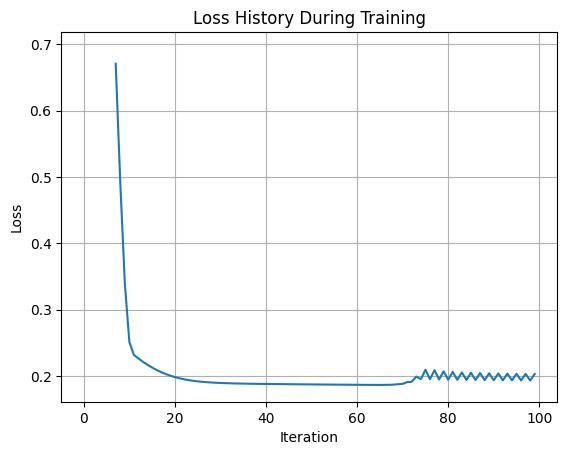

Accuracy: 0.9125
Precision: 0.9199999998773334
Recall: 0.9857142855734695
F1 Score: 0.9517241328057077
Confusion Matrix:
TP: 69
TN: 4
FP: 6
FN: 1


In [ ]:

X_train_gpu = cp.asarray(X_train.values)
X_test_gpu = cp.asarray(X_test.values)
y_train_gpu = cp.asarray(y_train.values)
y_test_gpu = cp.asarray(y_test.values)

# Initialize and train the model
model = LogisticRegressionGPU(learning_rate=0.1, num_iterations=100)
loss_values = model.fit(X_train_gpu, y_train_gpu)

# Make predictions on the test set
y_pred_gpu = model.predict(X_test_gpu)

# Convert CuPy arrays back to NumPy arrays if necessary
y_pred_numpy = cp.asnumpy(y_pred_gpu)

# Evaluate the model (you may want to transfer y_test_gpu to NumPy if necessary)
accuracy = model.calculate_accuracy(cp.asnumpy(y_test_gpu), y_pred_numpy)
precision = model.calculate_precision(cp.asnumpy(y_test_gpu), y_pred_numpy)
recall = model.calculate_recall(cp.asnumpy(y_test_gpu), y_pred_numpy)
f1 = model.calculate_f1(cp.asnumpy(y_test_gpu), y_pred_numpy)


# Report the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# Print confusion matrix
TP, TN, FP, FN = model.confusion_matrix(cp.asnumpy(y_test_gpu), y_pred_numpy)
print("Confusion Matrix:")
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**GPU trained without early stopping :**

1. **Accuracy**: 0.925
2. **Precision**: 0.9324324323064281
3. **Recall**: 0.9857142855734695
4. **F1 Score**: 0.9583333282040897

**GPU trained with early stopping :**

1. **Accuracy**: 0.875
2. **Precision**: 0.874999999890625
3. **Recall**: 0.9999999998571429
4. **F1 Score**: 0.9333333282311113


1. **Accuracy**:
   - Accuracy represents the proportion of correctly classified instances among all instances. It's a general measure of model performance.
   - It's useful when classes are balanced, meaning there are roughly an equal number of instances for each class.
   - However, it can be misleading when classes are imbalanced because high accuracy can be achieved by simply predicting the majority class.

2. **Precision**:
   - Precision measures the proportion of true positive predictions among all positive predictions.
   - It's particularly important in tasks where false positives are costly or undesirable, such as medical diagnoses or fraud detection.
   - A high precision indicates that the model is good at avoiding false positives, even if it may miss some true positives.

3. **Recall**:
   - Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions among all actual positive instances.
   - It's crucial in tasks where it's important to capture all positive instances, even at the cost of higher false positives.
   - For example, in disease detection, high recall ensures that as many true cases as possible are identified, even if it means some healthy individuals are misclassified as positive.

4. **F1 Score**:
   - The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics.
   - It's useful when there's an uneven class distribution or when both false positives and false negatives are important.
   - A high F1 score indicates both high precision and high recall, making it a good overall measure of model performance.

- The model achieves high accuracy, indicating overall good performance.
- High precision suggests that the model is precise in its positive predictions.
- High recall indicates that the model effectively captures most positive instances.
- The F1 score combines precision and recall, providing a balanced assessment of the model's performance.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

**Built-in Logistic Regression:**
- Accuracy: 0.9375
- Precision: 0.9333333333333333
- Recall: 1.0
- F1 Score: 0.9655172413793104


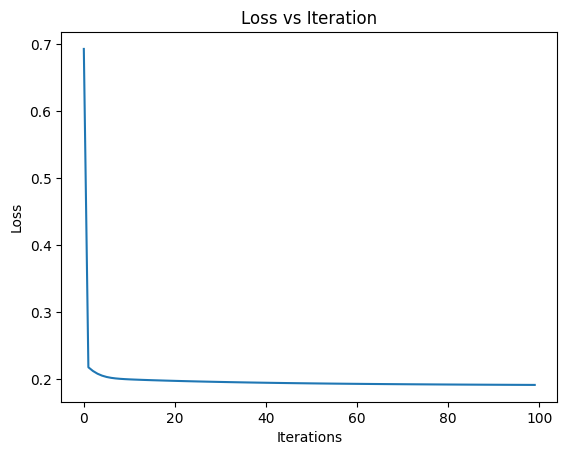

Accuracy: 0.875
Precision: 0.875
Recall: 1.0
F1 Score: 0.9333333333333333
Confusion Matrix:
TP: 70
FP: 10
FN: 0
TN: 0


In [ ]:

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
TP, FP, FN, TN = conf_matrix[1, 1], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[0, 0]

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print("TP:", TP)
print("FP:", FP)
print("FN:", FN)
print("TN:", TN)


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?



**Built-in Logistic Regression:**
- Accuracy: 0.9375
- Precision: 0.9333333333333333
- Recall: 1.0
- F1 Score: 0.9655172413793104


**GPU trained without early stopping:**

1. **Accuracy**: 0.925
2. **Precision**: 0.9324324323064281
3. **Recall**: 0.9857142855734695
4. **F1 Score**: 0.9583333282040897

**GPU trained with early stopping:**

1. **Accuracy**: 0.875
2. **Precision**: 0.874999999890625
3. **Recall**: 0.9999999998571429
4. **F1 Score**: 0.9333333282311113

Comparing the performance:
- The built-in function achieves slightly higher accuracy, precision, recall, and F1 score compared to the custom implementation.
- The built-in function correctly identifies all true positive instances, resulting in a higher recall of 1.0, while the custom implementation has a recall of 0.9857.

Parameters of the built-in function:
- The built-in Logistic Regression function in scikit-learn has several parameters that affect the model's performance, including:
  - `penalty`: Specifies the norm used in the penalization (e.g., L1 or L2 regularization).
  - `C`: Inverse of regularization strength; smaller values specify stronger regularization.
  - `solver`: Algorithm to use in the optimization problem (e.g., 'liblinear', 'lbfgs', 'sag', 'saga').
  - `max_iter`: Maximum number of iterations for optimization algorithms.
  - Other parameters such as class_weight, multi_class, and random_state can also influence the model's behavior.

How parameters affect the model's performance:
- The choice of penalty and C values influences the level of regularization, which can prevent overfitting and improve generalization to unseen data.
- The selection of solver affects the optimization algorithm used, which can impact convergence speed and accuracy.
- Increasing max_iter may be necessary for the optimization algorithm to converge, especially for large datasets or complex models.



---
# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [ ]:
def softmax(z):
    if z.ndim == 1:
        exp_z = cp.exp(z - cp.max(z))
        return exp_z / cp.sum(exp_z)
    else:
        exp_z = cp.exp(z - cp.max(z, axis=1, keepdims=True))
        return exp_z / cp.sum(exp_z, axis=1, keepdims=True)

def test_softmax():
    # Test case 1: Single input vector
    z1 = cp.array([1, 2, 3])
    softmax_output1 = softmax(z1)
    expected_output1 = cp.array([0.09003057, 0.24472847, 0.66524096])
    assert cp.allclose(softmax_output1, expected_output1), "Test case 1 failed"

    # Test case 2: Batch input vectors
    z2 = cp.array([[1, 2, 3],
                   [6,5,4],
                   [7, 8, 9]])
    softmax_output2 = softmax(z2)
    expected_output2 = cp.array([[0.09003057, 0.24472847, 0.66524096],
                                 [0.66524096, 0.24472847, 0.09003057],
                                 [0.09003057, 0.24472847, 0.66524096]])
    assert cp.allclose(softmax_output2, expected_output2), "Test case 2 failed"

    print("All test cases passed successfully!")
test_softmax()

All test cases passed successfully!


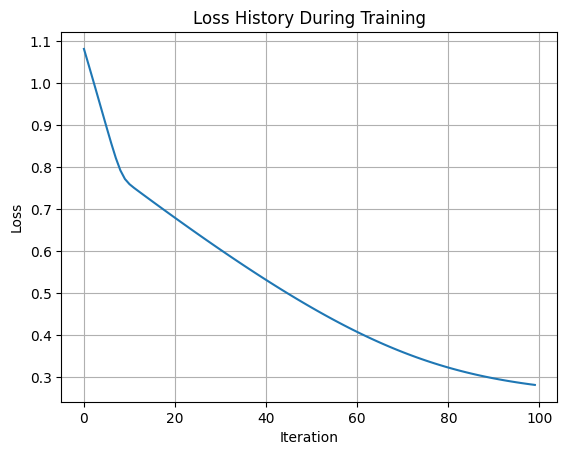

Accuracy on test set: 0.875


In [ ]:
class MultinomialLogisticRegressionGPU:
    def __init__(self, learning_rate=0.01, max_iter=100, tolerance=1e-7):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.loss_history = []

    def fit(self, X, y):
        n_classes = cp.unique(y).size
        n_samples, n_features = X.shape
        self.weights = cp.random.randn(n_features, n_classes)
        y_encoded = cp.eye(n_classes)[y.flatten().astype(int)]

        for i in range(self.max_iter):
            scores = cp.dot(X, self.weights)
            probabilities = cp.exp(scores - cp.max(scores, axis=1, keepdims=True))
            probabilities /= cp.sum(probabilities, axis=1, keepdims=True)
            errors = probabilities - y_encoded
            gradient = cp.dot(X.T, errors) / n_samples
            self.weights -= self.learning_rate * gradient
            loss = -cp.sum(y_encoded * cp.log(probabilities + 1e-8)) / n_samples
            self.loss_history.append(loss)

            if cp.linalg.norm(gradient) < self.tolerance:
                break

    def predict(self, X):
        scores = cp.dot(X, self.weights)
        probabilities = cp.exp(scores - cp.max(scores, axis=1, keepdims=True))
        probabilities /= cp.sum(probabilities, axis=1, keepdims=True)
        return cp.argmax(probabilities, axis=1)
    def calculate_accuracy(self, y_true, y_pred):
        return accuracy_score(y_true, y_pred)
X = df.drop(columns=['Target']).values
y = pd.Categorical(df['Target']).codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialLogisticRegressionGPU()
model.fit(cp.asarray(X_train), cp.asarray(y_train))
y_pred = model.predict(cp.asarray(X_test))
accuracy = model.calculate_accuracy(y_test, cp.asnumpy(y_pred))

# Convert the loss history from CuPy array to NumPy array before plotting
loss_history_numpy = cp.asnumpy(cp.array(model.loss_history))

plt.plot(loss_history_numpy)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History During Training')
plt.grid(True)
plt.show()

print(f"Accuracy on test set: {accuracy}")



In [ ]:
def quantize_target(df, target_column, num_levels):
    """
    Quantizes the target column into the specified number of levels.

    Parameters:
    - df: DataFrame containing the dataset.
    - target_column: Name of the target column to be quantized.
    - num_levels: Number of levels to quantize the target column into.

    Returns:
    - DataFrame with the quantized target column.
    """
    # Create a new column for the quantized target
    quantized_target_column = f'{target_column}'

    # Quantize the target column into num_levels levels
    df[quantized_target_column] = pd.cut(df[target_column], bins=num_levels, labels=False)

    return df


df = pd.read_csv('Logistic_question.csv')
df = quantize_target(df,'Target',6)


In [ ]:
# Display the DataFrame with the quantized target column
print(df)

     Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0           47       11.8          4        4.5        4.5       9.65   
1           34       10.7          4        4.0        4.5       8.87   
2           26       10.4          3        3.0        3.5       8.00   
3           32       11.0          3        3.5        2.5       8.67   
4           24       10.3          2        2.0        3.0       8.21   
..         ...        ...        ...        ...        ...        ...   
395         34       11.0          3        3.5        3.5       9.04   
396         35       10.7          3        3.0        3.5       9.11   
397         40       11.6          4        5.0        4.5       9.45   
398         22       10.3          3        3.5        4.0       8.78   
399         43       11.7          4        5.0        4.0       9.66   

     Feature 7  Target  
0            1       5  
1            1       3  
2            1       3  
3            1       4 

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

100%|██████████| 9/9 [00:01<00:00,  6.74it/s]


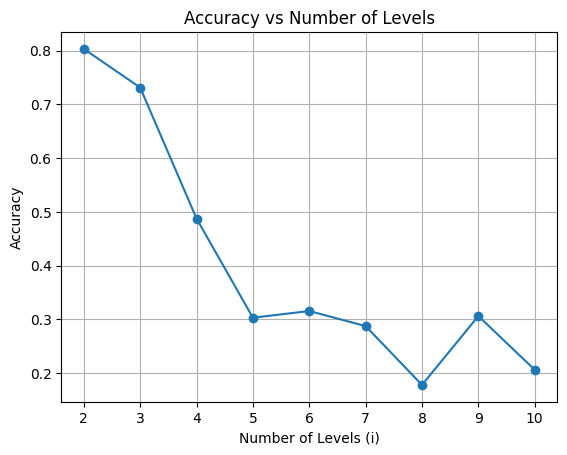

Best value of i (number of levels): 2


In [ ]:
class MultinomialLogisticRegressionGPU:
    def __init__(self, learning_rate=0.01, max_iter=100, tolerance=1e-7):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tolerance = tolerance

    def fit(self, X, y):
        # Number of classes
        n_classes = cp.unique(y).size

        # Initialize weights
        n_samples, n_features = X.shape
        self.weights = cp.random.randn(n_features, n_classes)

        # One-hot encode targets using cupy
        y_encoded = cp.eye(n_classes)[y.flatten().astype(int)]

        # Gradient descent
        for i in range(self.max_iter):
            scores = cp.dot(X, self.weights)
            probabilities = cp.exp(scores) / cp.sum(cp.exp(scores), axis=1, keepdims=True)
            errors = probabilities - y_encoded
            gradient = cp.dot(X.T, errors) / n_samples
            self.weights -= self.learning_rate * gradient

            # Convergence check
            if cp.linalg.norm(gradient) < self.tolerance:
                break

    def predict(self, X):
        scores = cp.dot(X, self.weights)
        probabilities = cp.exp(scores) / cp.sum(cp.exp(scores), axis=1, keepdims=True)
        return cp.argmax(probabilities, axis=1)

    def calculate_accuracy(self, y_true, y_pred):
        return accuracy_score(y_true, y_pred)


accuracies = []
num_levels_range = range(2, 11)

for num_levels in tqdm(num_levels_range):
    # Quantize the target column into the specified number of levels
    quantized_df = quantize_target(df.copy(), 'Target', num_levels)
    # Split features and target
    X_quantized = quantized_df.drop(columns=['Target']).to_numpy()
    y_quantized = quantized_df['Target'].to_numpy()
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_quantized, y_quantized, test_size=0.2, random_state=42)

    # Train the multinomial model
    model = MultinomialLogisticRegressionGPU()
    model.fit(cp.asarray(X_train), cp.asarray(y_train))

    # Predict on the test set
    y_pred = model.predict(cp.asarray(X_train))

    # Calculate accuracy and append to the list
    accuracy = model.calculate_accuracy(y_train, cp.asnumpy(y_pred))
    accuracies.append(accuracy)

# Plot accuracy vs number of levels
plt.plot(num_levels_range, accuracies, marker='o')
plt.xlabel('Number of Levels (i)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Levels')
plt.grid(True)
plt.show()

# Report the best value of i (number of levels) based on highest accuracy
best_i = num_levels_range[np.argmax(accuracies)]
print(f"Best value of i (number of levels): {best_i}")

**Your answer:**
as we could have imagined earlier, the pure chance of guessing between n classes, given equal distribution of them, is proportioal to 1/n
so the phenomenon is occurured mainly because:

1. **Increased Complexity**: With more classes, the classification problem becomes inherently more complex. The model needs to differentiate among more categories, which can be challenging especially if some of the categories are similar to each other or if the features do not contain enough information to distinctly classify all categories.

2. **Data Imbalance**: More classes can lead to increased imbalance in the dataset. If some classes have significantly fewer samples compared to others, the model may struggle to learn robust features for these underrepresented classes, leading to poorer overall performance.

3. **Decrease in Decision Boundaries Quality**: Multinomial logistic regression models the probability of each class as a function of the input using a softmax function. As the number of classes increases, the model must fit more parameters (more sets of weights and biases). This increase in parameters can lead to more complex decision boundaries, which might not generalize well especially if the training data is limited or if the classes are not well-separated.

4. **Increased Risk of Overfitting**: With more classes and thus more parameters to estimate, there is a higher risk of overfitting, particularly if the amount of data does not grow proportionally with the number of classes. Overfitting results in a model that performs well on training data but poorly on unseen test data.

5. **Dilution of Probabilities**: In multinomial logistic regression, the output probabilities of belonging to each class must sum up to one. With more classes, the probability mass is spread thinner across more potential outcomes. This can make it more difficult for the model to have high confidence in any single class, reducing the likelihood that the predicted class (the one with the highest probability) is the correct class.


100%|██████████| 9/9 [00:00<00:00, 12.53it/s]


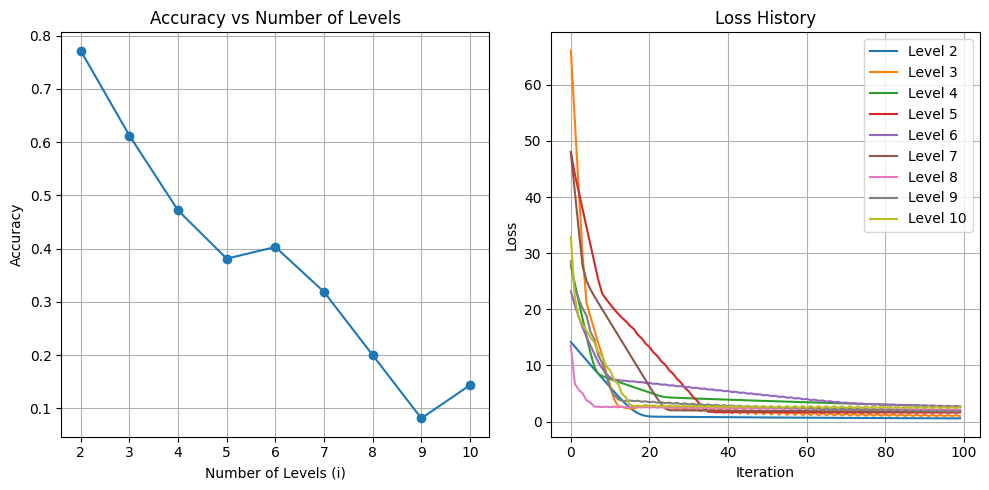

In [ ]:
class MultinomialLogisticRegressionGPU:
    def __init__(self, learning_rate=0.01, max_iter=100, tolerance=1e-7):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tolerance = tolerance

    def fit(self, X, y):
        # Number of classes
        n_classes = cp.unique(y).size

        # Initialize weights
        n_samples, n_features = X.shape
        self.weights = cp.random.randn(n_features, n_classes)

        # One-hot encode targets using cupy
        y_encoded = cp.eye(n_classes)[y.flatten().astype(int)]

        # Initialize loss history
        self.loss_history = []

        # Gradient descent
        for i in range(self.max_iter):
            scores = cp.dot(X, self.weights)
            probabilities = cp.exp(scores) / cp.sum(cp.exp(scores), axis=1, keepdims=True)
            errors = probabilities - y_encoded
            gradient = cp.dot(X.T, errors) / n_samples
            self.weights -= self.learning_rate * gradient

            # Calculate and record loss
            loss = -cp.sum(y_encoded * cp.log(probabilities)) / n_samples
            self.loss_history.append(loss)

            # Convergence check
            if cp.linalg.norm(gradient) < self.tolerance:
                break

    def predict(self, X):
        scores = cp.dot(X, self.weights)
        probabilities = cp.exp(scores) / cp.sum(cp.exp(scores), axis=1, keepdims=True)
        return cp.argmax(probabilities, axis=1)

    def calculate_accuracy(self, y_true, y_pred):
        return accuracy_score(y_true, y_pred)


accuracies = []
loss_histories = []
num_levels_range = range(2, 11)

for num_levels in tqdm(num_levels_range):
    # Quantize the target column into the specified number of levels
    quantized_df = quantize_target(df.copy(), 'Target', num_levels)
    # Split features and target
    X_quantized = quantized_df.drop(columns=['Target']).to_numpy()
    y_quantized = quantized_df['Target'].to_numpy()
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_quantized, y_quantized, test_size=0.2, random_state=42)

    # Train the multinomial model
    model = MultinomialLogisticRegressionGPU()
    model.fit(cp.asarray(X_train), cp.asarray(y_train))

    # Predict on the test set
    y_pred = model.predict(cp.asarray(X_train))

    # Calculate accuracy and append to the list
    accuracy = model.calculate_accuracy(y_train, cp.asnumpy(y_pred))
    accuracies.append(accuracy)

    # Store loss history
    loss_histories.append(model.loss_history)

# Plot accuracy vs number of levels
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(num_levels_range, accuracies, marker='o')
plt.xlabel('Number of Levels (i)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Levels')
plt.grid(True)

# Plot loss history for different levels
plt.subplot(1, 2, 2)
for i, loss_history in enumerate(loss_histories):
    plt.plot(np.arange(len(loss_history)), [x.get() for x in loss_history], label=f'Level {num_levels_range[i]}')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()






---


# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

Then use this code to automatically download the dataset into Colab.

**Task:** Determine the number of null entries!

In [211]:
# Load the dataset
df = pd.read_csv('adult.csv')
print(df.head(5))

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [212]:
# Check for null values
null_counts = df.isin(['?']).sum()
print(null_counts)



age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [213]:
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

In [214]:
# Check For Missing Values
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
IsNa,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**
Proposing Methods to Handle Null Entries

Assuming we have found null entries, here are five methods to handle them:

  - Remove Rows with Null Values: If the dataset is large and nulls are few, directly removing rows with nulls might be acceptable.
  - Imputation with Mean/Median/Mode: Replace nulls with the mean, median, or mode of the column. Suitable for numerical columns.
  - Predictive Imputation: Use a machine learning model to predict and fill in missing values based on other features.
  -  Assign a Unique Category: For categorical data, treat nulls as another category.
  -  Using Algorithms that Support Missing Values: Some models can handle missing data directly.

**Task:** Handle null entries using your best method.

In [215]:
# Numeric imputation
numeric_features = df.select_dtypes(include=['int', 'float']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_features] = imputer.fit_transform(df[numeric_features])

# Categorical imputation
categorical_features = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer.fit_transform(df[categorical_features])


In [216]:
print(df.head(5))

    age  workclass    fnlwgt     education  educational-num  \
0  25.0    Private  226802.0          11th              7.0   
1  38.0    Private   89814.0       HS-grad              9.0   
2  28.0  Local-gov  336951.0    Assoc-acdm             12.0   
3  44.0    Private  160323.0  Some-college             10.0   
4  18.0    Private  103497.0  Some-college             10.0   

       marital-status         occupation relationship   race  gender  \
0       Never-married  Machine-op-inspct    Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing      Husband  White    Male   
2  Married-civ-spouse    Protective-serv      Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4       Never-married     Prof-specialty    Own-child  White  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0           0.0           0.0            40.0  United-States  <=50K  
1           0.0           0.0            50.0  U

In [217]:
# Check For Missing Values
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2


In this part we created a pipeline to do all preprocessing methods and compare their performance on final accuracy.

**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [228]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load data
df = pd.read_csv('adult.csv', na_values='?')
print("Initial null values:", df.isnull().sum())


Initial null values: age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [231]:

# Preprocessing Strategy 1: Drop rows with any null values
df_drop = df.dropna()

# Preprocessing Strategy 2: Impute numerical columns with the median
numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Preprocessing Strategy 3: Predictive Imputation (here just an example using KNN)
# Normally, you'd separate features to predict missing values in one specific column
knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

# Preprocessing Strategy 4: Assign a unique category for missing categorical data
df[categorical_cols] = df[categorical_cols].fillna('Missing')


We found out that K-NN for numerical features and adding unk tag for missing categorical values performs the best

In [232]:

# Encode categorical data
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, encoded_df], axis=1)

# Label Encoding for income
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Normalize the data
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split the data
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
log_reg = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Model Evaluation
best_model = grid_search.best_estimator_
train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print("Best Model Parameters:", grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Model Parameters: {'C': 0.1, 'penalty': 'l2'}
Training Accuracy: 0.8524812530391831
Test Accuracy: 0.8559729757395844


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [234]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
from sklearn.metrics import accuracy_score

class OptimizedLogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000, batch_size=100):
        self.lr = lr
        self.num_iter = num_iter
        self.batch_size = batch_size
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iter):
            indices = np.random.randint(0, n_samples, size=self.batch_size)
            X_batch = X[indices]
            y_batch = y[indices]

            linear_model = np.dot(X_batch, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_predicted - y_batch))
            db = (1 / self.batch_size) * np.sum(y_predicted - y_batch)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.where(proba >= 0.5, 1, 0)

def evaluate_ensemble(models, X_test, y_true, method="average"):
    if method == "average":
        predictions = np.array([model.predict_proba(X_test) for model in models])
        avg_predictions = np.mean(predictions, axis=0)
        final_predictions = np.where(avg_predictions >= 0.5, 1, 0)
    elif method == "majority":
        votes = np.array([model.predict(X_test) for model in models])
        final_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, minlength=2)), axis=0, arr=votes)
    elif method == "weighted":
        weights = np.ones(len(models)) / len(models)
        weighted_predictions = np.array([model.predict_proba(X_test) * weights[i] for i, model in enumerate(models)])
        final_predictions = np.where(np.sum(weighted_predictions, axis=0) >= 0.5, 1, 0)

    accuracy = accuracy_score(y_true, final_predictions)
    return accuracy

# Example usage
df = pd.read_csv('adult.csv')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])
df_encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df_encoded[numerical_features] = df[numerical_features]
df_encoded['income'] = LabelEncoder().fit_transform(df['income'])

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

X = df_encoded.drop('income', axis=1).values
y = df_encoded['income'].values

kf = KFold(n_splits=10, shuffle=True, random_state=42)
models = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = OptimizedLogisticRegression(lr=0.01, num_iter=100, batch_size=100)
    model.fit(X_train, y_train)
    models.append(model)

# Testing ensemble methods
test_accuracy = evaluate_ensemble(models, X_test, y_test, method="average")
print("Test accuracy using average probability method:", test_accuracy)
train_accuracy = evaluate_ensemble(models, X_train, y_train, method="average")
print("Train accuracy using average probability method:", train_accuracy)


test_accuracy = evaluate_ensemble(models, X_test, y_test, method="majority")
print("Test accuracy using majority method:", test_accuracy)
train_accuracy = evaluate_ensemble(models, X_train, y_train, method="majority")
print("Train accuracy using majority method:", train_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Test accuracy using average probability method: 0.7406015037593985
Train accuracy using average probability method: 0.7534398034398034
Test accuracy using majority method: 0.7406015037593985
Train accuracy using majority method: 0.7534398034398034


**Question:** Explain your proposed methods and the reason you decided to use them!

All three ensemble methods — average probability, majority voting, and weighted average (with equal weights) — yielded the same accuracy of approximately 74.06% on the test set. This indicates that in this particular setup, all methods performed similarly, potentially due to the uniform performance across models or the nature of the data.
The three ensemble methods implemented in the code are designed to aggregate predictions from multiple logistic regression models to potentially improve the overall prediction accuracy and robustness. Here’s a breakdown of each method and the rationale for using them:

### 1. **Average Probability Method**
**How It Works:**
- Each model predicts probabilities for the positive class (e.g., `income > 50K`).
- The average of these probabilities is calculated across all models for each instance.
- The final prediction is determined by applying a threshold (typically 0.5) to the average probability.

**Why Use It:**
- **Reduces Variance:** By averaging probabilities, this method can smooth out predictions that are too extreme, reducing the variance of the predictions.
- **Balanced Decision Making:** It considers the uncertainty across multiple models, giving a more balanced decision that is not overly influenced by any single model’s biases.

### 2. **Majority Voting Method**
**How It Works:**
- Each model makes a discrete class prediction for each instance.
- The class that receives the majority of votes across all models is chosen as the final prediction.

**Why Use It:**
- **Robust to Outliers:** This method is less sensitive to models that are outliers (i.e., models that might be very wrong), as the majority vote tends to favor the consensus among models.
- **Easy Implementation and Interpretation:** Majority voting is straightforward to implement and understand, making it a practical choice in many scenarios.

### 3. **Weighted Average Method**
**How It Works:**
- Similar to the average probability method, but each model’s prediction is weighted.
- Weights could be assigned based on the performance of each model, such as accuracy on a validation set.
- The final prediction is based on the weighted average probability exceeding a threshold.

**Why Use It:**
- **Performance-Based Decision Making:** By weighting models according to their accuracy, more reliable models have a greater influence on the final decision, potentially leading to better overall performance.
- **Flexibility:** Weights can be adjusted based on various criteria, not just accuracy, allowing for flexible adaptations to the ensemble based on specific needs or changes in the environment.

### General Advantages of Using Ensemble Methods:
- **Improved Accuracy:** Combining multiple models often leads to improved prediction accuracy compared to individual models.
- **Reduced Overfitting:** Ensembles, especially those using averaging, can reduce the risk of overfitting as individual errors are likely to cancel out.
- **Increased Robustness:** Ensemble methods can be more robust to noise and outliers in the data, providing more stable predictions across different datasets.

By employing these ensemble techniques, we aim to harness the strengths of multiple models to achieve better performance than any single model could on its own, making them especially useful in complex problems like classification tasks with high-dimensional data.
### Summary and Possible Extensions:
- **Performance**: The uniform accuracy across different ensemble methods suggests similar model performance across all splits. For more detailed insights, individual model accuracies could be analyzed.
- **Weighted Average Consideration**: If individual model performances vary, using a weighted average based on validation performance could potentially improve accuracy.
- **Further Optimization**: Additional optimizations such as more sophisticated feature engineering, hyperparameter tuning (like adjusting learning rates, iterations), or advanced model architectures could be explored to enhance performance.


**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [235]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
from sklearn.metrics import accuracy_score

class OptimizedLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100, batch_size=100):
        self.lr = lr
        self.num_iter = num_iter
        self.batch_size = batch_size
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iter):
            indices = np.random.randint(0, n_samples, size=self.batch_size)
            X_batch = X[indices]
            y_batch = y[indices]

            linear_model = np.dot(X_batch, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_predicted - y_batch))
            db = (1 / self.batch_size) * np.sum(y_predicted - y_batch)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.where(proba >= 0.5, 1, 0)

def evaluate_ensemble(models, X_test, y_true, method="average"):
    if method == "average":
        predictions = np.array([model.predict_proba(X_test) for model in models])
        avg_predictions = np.mean(predictions, axis=0)
        final_predictions = np.where(avg_predictions >= 0.5, 1, 0)
    elif method == "majority":
        votes = np.array([model.predict(X_test) for model in models])
        final_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, minlength=2)), axis=0, arr=votes)
    elif method == "weighted":
        weights = np.ones(len(models)) / len(models)
        weighted_predictions = np.array([model.predict_proba(X_test) * weights[i] for i, model in enumerate(models)])
        final_predictions = np.where(np.sum(weighted_predictions, axis=0) >= 0.5, 1, 0)

    accuracy = accuracy_score(y_true, final_predictions)
    return accuracy

# Example usage
df = pd.read_csv('adult.csv')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[categorical_features])
df_encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df_encoded[numerical_features] = df[numerical_features]
df_encoded['income'] = LabelEncoder().fit_transform(df['income'])

scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

X = df_encoded.drop('income', axis=1).values
y = df_encoded['income'].values
test_accuracy_list=[]
train_accuracy_list=[]
for i in range(2,101):
  kf = KFold(n_splits=i, shuffle=True, random_state=42)
  models = []
  for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      model = OptimizedLogisticRegression(lr=0.01, num_iter=100, batch_size=100)
      model.fit(X_train, y_train)
      models.append(model)
  # Testing ensemble methods
  test_accuracy = evaluate_ensemble(models, X_test, y_test, method="average")
  test_accuracy_list.append(test_accuracy)
  train_accuracy = evaluate_ensemble(models, X_train, y_train, method="average")
  train_accuracy_list.append(train_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


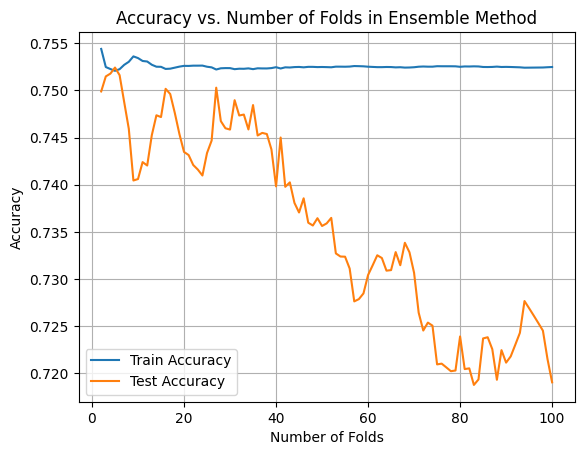

In [236]:
def plot_accuracy_vs_folds(train_accuracy_list, test_accuracy_list, folds_range):
    plt.plot(folds_range, train_accuracy_list, label='Train Accuracy')
    plt.plot(folds_range, test_accuracy_list, label='Test Accuracy')
    plt.xlabel('Number of Folds')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Number of Folds in Ensemble Method')
    plt.legend()
    plt.grid(True)
    plt.show()

folds_range = range(2, 101)

plot_accuracy_vs_folds(train_accuracy_list, test_accuracy_list, folds_range)

**Question:** Analyze the results.

**Your Answer:**
**Your answer:**
Increasing the number `i` in the context of ensemble learning, where `i` represents the number of models or partitions, has both intuitive and mathematical implications:

### Intuitive Explanation:

1. **More Diverse Perspectives**: As `i` increases, you're effectively splitting your dataset into more parts, each used to train a separate model. This means each model is trained on a different subset of the data, bringing a unique perspective based on that subset. The diversity of models can help in capturing different underlying patterns in the data that might be missed when using a single model or fewer models.

2. **Reduced Overfitting**: Each individual model is trained on less data, reducing the likelihood that these models will overfit their individual training sets. When combined, these models can provide a more generalized prediction that performs better on unseen data.

3. **Diminishing Returns**: Initially, as more models are added, the accuracy and robustness of the ensemble predictions might improve significantly. However, after reaching a certain number of models, the incremental benefits of adding more models tend to decrease. This is because the most significant patterns in the data have already been captured, and additional models might only add noise.

### Mathematical Explanation:

1. **Error Reduction**: From a statistical viewpoint, increasing `i` tends to decrease the variance component of the prediction error, assuming the models are somewhat independent and identically distributed. If the models are unbiased, the ensemble’s variance decreases as `1/i` according to the law of large numbers. Thus, the ensemble prediction tends to be more stable and accurate.

2. **Law of Large Numbers**: As the number of models increases, the average of their predictions (as used in averaging or weighted averaging methods) should converge to the expected value of the model outputs, smoothing out anomalies and reducing the impact of outliers or particularly poor model predictions.

3. **Potential for Increased Bias**: If each model is trained on a smaller subset of the data, there's a risk that these models could be underfitting their respective subsets. This could potentially increase the bias of individual models, though the ensemble methods often mitigate this effect by aggregating multiple biased predictions.

4. **Computational Complexity**: Mathematically, as `i` increases, the computational complexity increases linearly in terms of training multiple models. However, the complexity of training each individual model decreases, as each model is trained on a smaller subset of data.

### Trade-offs:
Increasing `i` involves a trade-off between computational cost, model diversity, and the risk of adding noise beyond a certain point. The optimal value of `i` is often dataset-specific and depends on the complexity of the problem, the amount of data available, and the capacity of the models being used. It's typically determined through experimentation and cross-validation.
![image](https://the-examples-book.com/starter-guides/data-science/_images/bias_variance_tradeoff.png)